In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv('C:/USERS/YASHN/HR-Employee-Attrition.csv')
df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Getting the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Checking the type of the data
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
# Checking the dimensions
df.shape

(1470, 35)

In [7]:
# Checking the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Here, we can see there are no null values in the dataset

<AxesSubplot:>

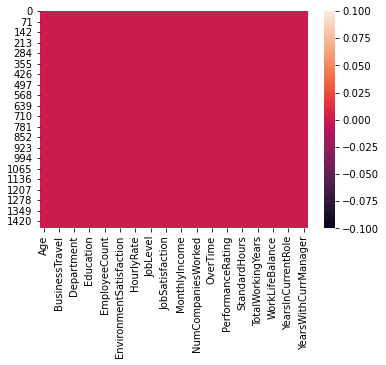

In [9]:
# Plotting heatmap
sns.heatmap(df.isnull())

In [11]:
# Statistical Summary
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [12]:
# Checking Value Counts of the Target Variable (Attribute)
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

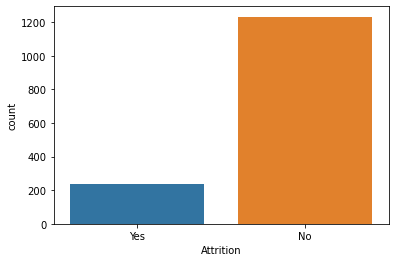

In [13]:
# Plotting the Countplot
sns.countplot(df['Attrition'])

In [14]:
# Checking the unique values in the data
df.nunique()


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
# Dropping irrelavent columns 
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [16]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={

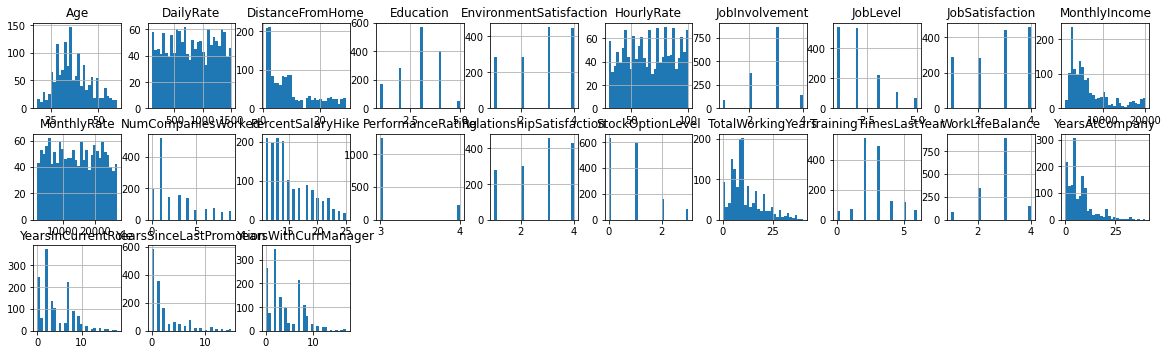

In [30]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

In [17]:
# Checking the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

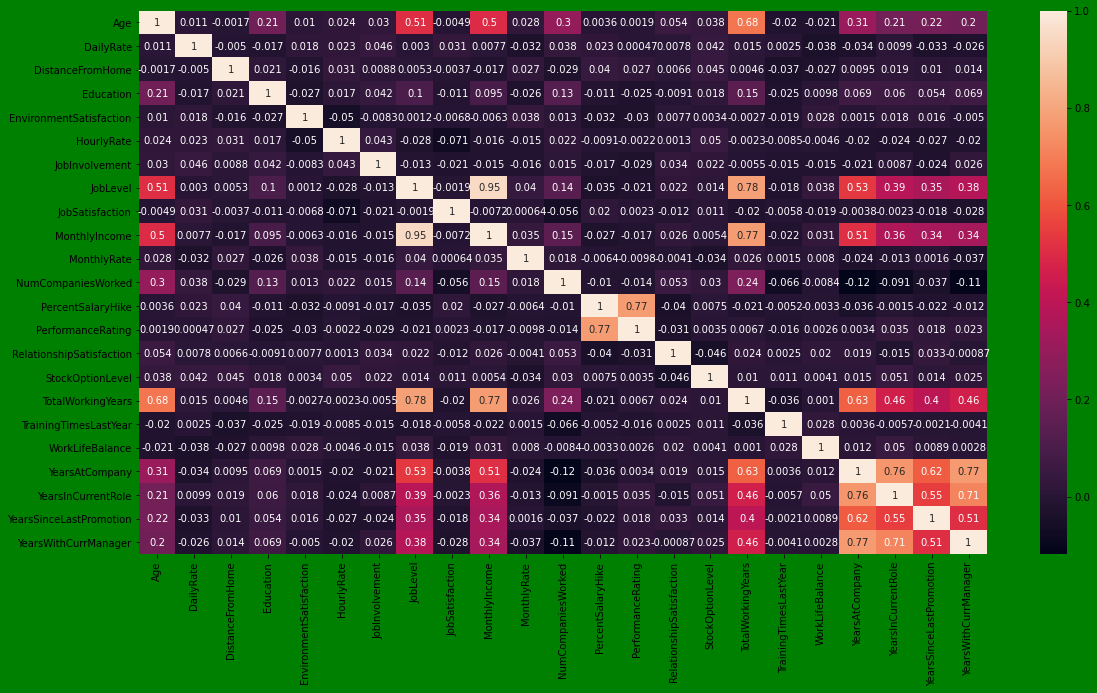

In [18]:
# Plotting the heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

In [19]:
# Converting Non numeric data into numeric 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Attrition"] = le.fit_transform(df['Attrition'])
df["BusinessTravel"] = le.fit_transform(df['BusinessTravel'])
df["Department"] = le.fit_transform(df['Department'])
df["EducationField"] = le.fit_transform(df['EducationField'])
df["Gender"] = le.fit_transform(df['Gender'])
df["JobRole"] = le.fit_transform(df['JobRole'])
df["MaritalStatus"] = le.fit_transform(df['MaritalStatus'])
df["OverTime"] = le.fit_transform(df['OverTime'])

In [20]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [21]:
# Checking duplicate data
print(df.shape)

# Remove duplicate Features
df = df.drop_duplicates()
df = df

# Remove Duplicate Rows
df.drop_duplicates(inplace=True)

print(df.shape)

(1470, 31)
(1470, 31)


In [22]:
# Checking Skewness
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

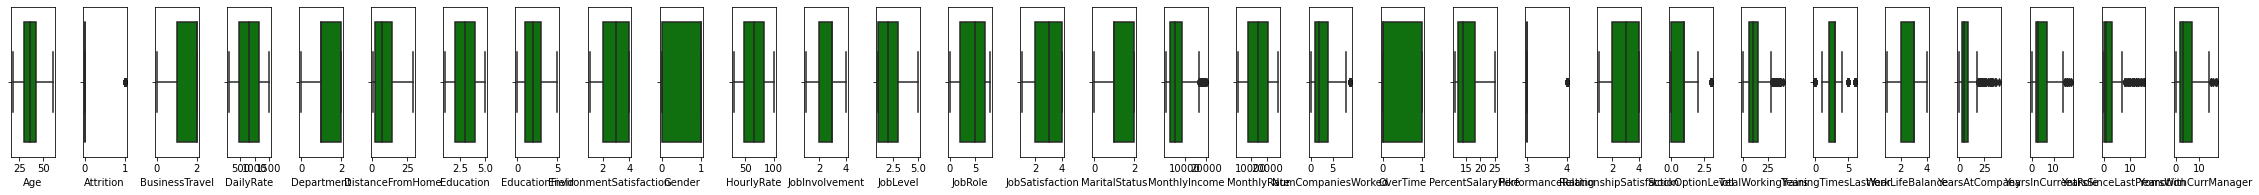

In [23]:
# Checking Outliers
collist=df.columns.values
ncol=31
nrows=35
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [24]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [25]:
threshold=3
print(np.where(z<3))

(array([   0,    0,    0, ..., 1469, 1469, 1469], dtype=int64), array([ 0,  1,  2, ..., 28, 29, 30], dtype=int64))


In [26]:
z[6][8]

0.2546249253678617

In [27]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [28]:
df_new.shape

(1387, 31)

In [30]:
# Checking the percentage of loss data
loss_percent =(1470-1387)/1470*100
print(loss_percent)

5.646258503401361


After removing the outliers, we can see that the percentage of loss data is 5.64 %

In [31]:
# Rechecking the skewness in new df
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [32]:
# Spliting target variable and independent variables
x = df.drop(['Attrition'], axis = 1)
y = df['Attrition']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 0, stratify=y)

In [34]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
x_std = scaler.transform(x)

In [35]:
x_train.shape

(1102, 30)

In [36]:
y_train.shape

(1102,)

In [37]:
x_test.shape

(368, 30)

In [98]:
y_test.shape

(368,)

In [40]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.21589394668330597


In [43]:
from sklearn.metrics import mean_absolute_error
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))

MSE: 0.10850267982731848
MAE: 0.24576406955756933
r2_score: -2.6462364486222962


In [44]:
# Using SGD regressor
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -1.0133867852372285e+35
MSE: 1.3642378368427985e+34
MAE: 1.0604392875790392e+17
RMSE: 1.1680059232909731e+17


In [45]:
# Using LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [46]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.034848695058332435
MSE: 0.12993024456810862
MAE: 0.26307772546715935
RMSE: 0.3604583811872164


In [47]:
# Using RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'auto'}


In [48]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.03495463333402149
MSE: 0.12991598298445958
MAE: 0.26301937760920824
RMSE: 0.36043859807803547


In [49]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.8393829401088929
Testing accuracy : 0.842391304347826
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       309
           1       0.57      0.07      0.12        59

    accuracy                           0.84       368
   macro avg       0.71      0.53      0.52       368
weighted avg       0.80      0.84      0.79       368

[[306   3]
 [ 55   4]]


In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 85.6%


In [51]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7717391304347826


In [53]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       309
           1       0.28      0.27      0.28        59

    accuracy                           0.77       368
   macro avg       0.57      0.57      0.57       368
weighted avg       0.77      0.77      0.77       368

[[268  41]
 [ 43  16]]


In [54]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8641304347826086


In [56]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       309
           1       1.00      0.15      0.26        59

    accuracy                           0.86       368
   macro avg       0.93      0.58      0.59       368
weighted avg       0.88      0.86      0.82       368

[[309   0]
 [ 50   9]]


In [57]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.838475499092559
Testing accuracy : 0.8396739130434783


In [58]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.00      0.00      0.00        59

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368

[[309   0]
 [ 59   0]]


In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.110748, 0.012301
R   : 0.110739, 0.012299


In [61]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [62]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [63]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [64]:
rf_randomized.best_params_

{'n_estimators': 733,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [65]:
rf_final=rf_randomized.best_estimator_

In [66]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 85 %

In [68]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7372058581536943

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [70]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.01294498,
       0.02265372, 0.02588997, 0.08737864, 0.10355987, 0.11650485,
       0.12621359, 0.14886731, 0.16828479, 0.17799353, 0.18770227,
       0.19417476, 0.197411  , 0.2038835 , 0.22006472, 0.22977346,
       0.23300971, 0.26537217, 0.27831715, 0.28802589, 0.30420712,
       0.33333333, 0.4433657 , 0.65372168, 0.69255663, 0.81229773,
       0.82524272, 0.89644013, 0.96116505, 0.97087379, 0.97734628,
       0.98058252, 0.98705502, 1.        ])

In [71]:
tpr

array([0.        , 0.01694915, 0.08474576, 0.15254237, 0.15254237,
       0.16949153, 0.18644068, 0.28813559, 0.3559322 , 0.40677966,
       0.45762712, 0.45762712, 0.47457627, 0.52542373, 0.54237288,
       0.55932203, 0.55932203, 0.55932203, 0.57627119, 0.59322034,
       0.59322034, 0.61016949, 0.66101695, 0.69491525, 0.71186441,
       0.74576271, 0.76271186, 0.88135593, 0.89830508, 0.93220339,
       0.94915254, 0.96610169, 0.98305085, 0.98305085, 0.98305085,
       1.        , 1.        , 1.        ])

In [72]:
thresholds

array([1.84615385, 0.84615385, 0.66666667, 0.50943396, 0.42222222,
       0.42021277, 0.41638796, 0.41584158, 0.4017094 , 0.38974359,
       0.38793103, 0.38613861, 0.375     , 0.37365591, 0.34598214,
       0.34020619, 0.32786885, 0.31034483, 0.30866142, 0.29411765,
       0.28947368, 0.28      , 0.2481203 , 0.24463519, 0.24266145,
       0.22126437, 0.2194745 , 0.21940928, 0.21108179, 0.20697168,
       0.19130435, 0.1663286 , 0.1588785 , 0.14035088, 0.11290323,
       0.1122449 , 0.10714286, 0.09756098])

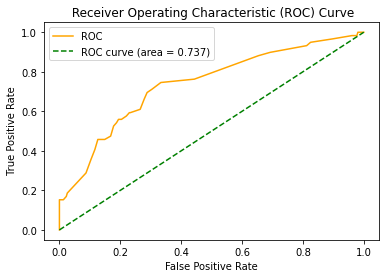

In [73]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='green', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [67]:
# Saving The model
import pickle
file = 'HR ANALYTICS CASE STUDY'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [74]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,0
...,...,...
363,0,0
364,0,0
365,0,0
366,0,0
